In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression

import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset

from qbstyles import mpl_style

mpl_style(dark=True)

In [2]:
def transform(x):
    x = torch.tensor(x, dtype=torch.float)
    x = x.reshape(-1, 1)
    return x

def predict(model, x):
    model.eval()
    with torch.no_grad():
        return model(transform(x)).flatten().numpy()

<Axes: xlabel='x', ylabel='y'>

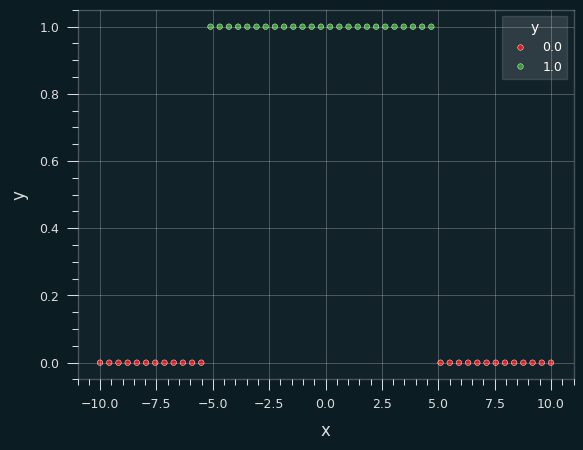

In [3]:
x = np.linspace(-10, 10)
y = np.zeros_like(x)

start = int(x.size * 0.25)
stop = int(x.size * 0.75)

y[start:stop] = 1

data = pd.DataFrame({'x': x, 'y': y})

sns.scatterplot(data=data, x='x', y='y', hue='y', markers=['x', 'o'])

In [4]:
dataset = TensorDataset(
    transform(x),
    transform(y),
)

Epoch 1/500: loss = 0.7463, accuracy = 0.5000
Epoch 2/500: loss = 0.7246, accuracy = 0.5000
Epoch 3/500: loss = 0.7094, accuracy = 0.5000
Epoch 4/500: loss = 0.6988, accuracy = 0.5000
Epoch 5/500: loss = 0.6915, accuracy = 0.5000
Epoch 6/500: loss = 0.6865, accuracy = 0.5000
Epoch 7/500: loss = 0.6829, accuracy = 0.5000
Epoch 8/500: loss = 0.6804, accuracy = 0.5000
Epoch 9/500: loss = 0.6785, accuracy = 0.5000
Epoch 10/500: loss = 0.6770, accuracy = 0.6600
Epoch 11/500: loss = 0.6758, accuracy = 0.7400
Epoch 12/500: loss = 0.6748, accuracy = 0.8000
Epoch 13/500: loss = 0.6739, accuracy = 0.8400
Epoch 14/500: loss = 0.6731, accuracy = 0.8800
Epoch 15/500: loss = 0.6722, accuracy = 0.9200
Epoch 16/500: loss = 0.6714, accuracy = 0.9200
Epoch 17/500: loss = 0.6706, accuracy = 0.9200
Epoch 18/500: loss = 0.6698, accuracy = 0.9400
Epoch 19/500: loss = 0.6690, accuracy = 0.9200
Epoch 20/500: loss = 0.6682, accuracy = 0.9200
Epoch 21/500: loss = 0.6673, accuracy = 0.9200
Epoch 22/500: loss = 0

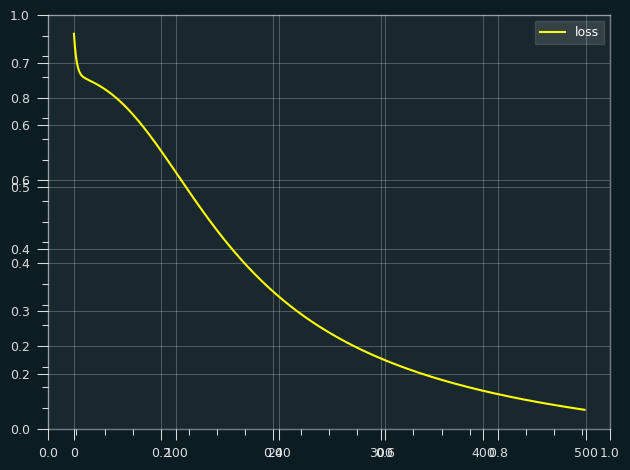

In [5]:
model = nn.Sequential(
    nn.Linear(1, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
    nn.Sigmoid(),
)

optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 500
criterion = nn.BCELoss()

losses = []
accuracies = []
for epoch in range(1, epochs + 1):
    cost = 0
    for x_batch, y_batch in dataset:
        model.train()
        yhat = model(x_batch)
        loss = criterion(yhat, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cost += loss.item()
    
    cost /= len(dataset)
    losses.append(cost)
    
    y_pred = predict(model, x).round()
    accuracy = accuracy_score(y, y_pred)
    accuracies.append(accuracy)
    
    print(f"Epoch {epoch}/{epochs}: loss = {losses[-1]:.4f}, accuracy = {accuracy:.4f}")

model_metrics = pd.DataFrame({
    "loss": losses,
    "accuracy": accuracies,
})

model_metrics.plot.line(y='loss', color='yellow')
plt.tight_layout()

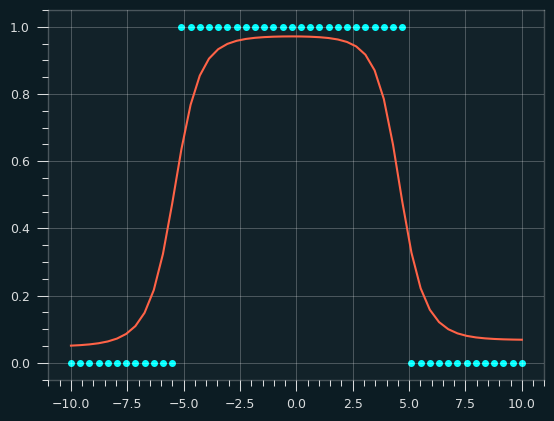

In [6]:
plt.scatter(x, y, color='cyan')
plt.plot(x, predict(model, x), color='tomato')

In [28]:
parameters = model.state_dict()

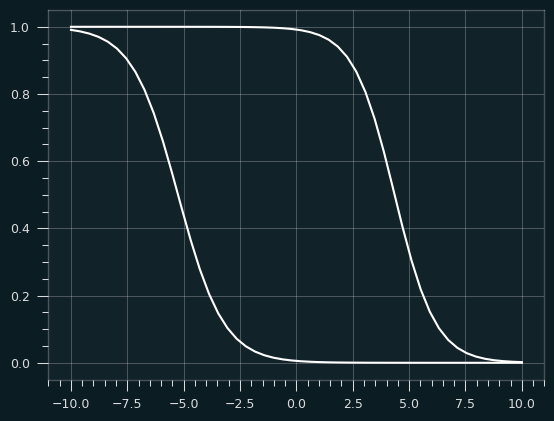

In [40]:
layer1_output = transform(x) @ parameters['0.weight'].T + parameters['0.bias']
layer1_output = torch.sigmoid(layer1_output)

plt.plot(x, layer1_output[:, 0], color="white")
plt.plot(x, layer1_output[:, 1], color="white")

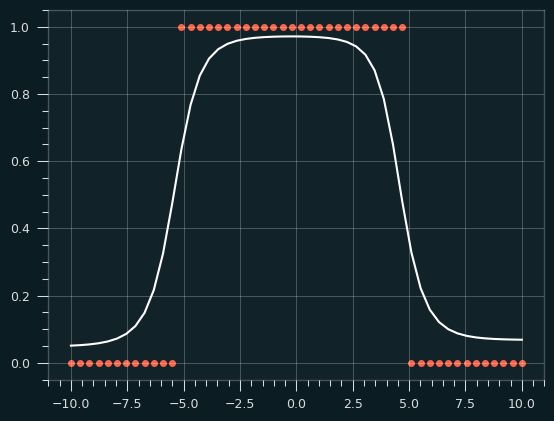

In [52]:
layer2_output = layer1_output @ parameters['2.weight'].T + parameters['2.bias']
layer2_output = torch.sigmoid(layer2_output)

plt.scatter(x, y, color='tomato')
plt.plot(x, layer2_output, color='white')